<a href="https://colab.research.google.com/github/rijalammar1/PVCK_RijalAmmar/blob/main/Jobsheet10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

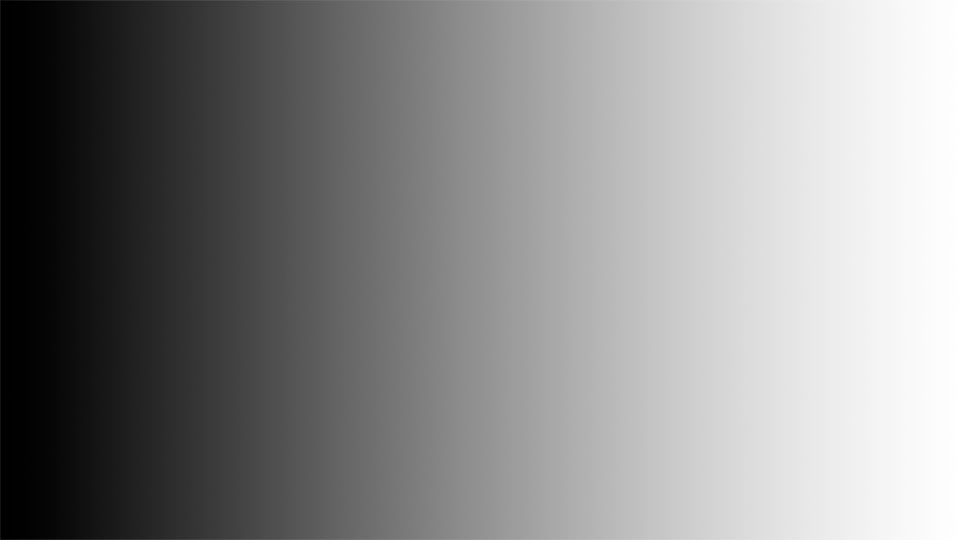

In [3]:
input_image = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/gradient.jpg')
cv2_imshow(input_image)

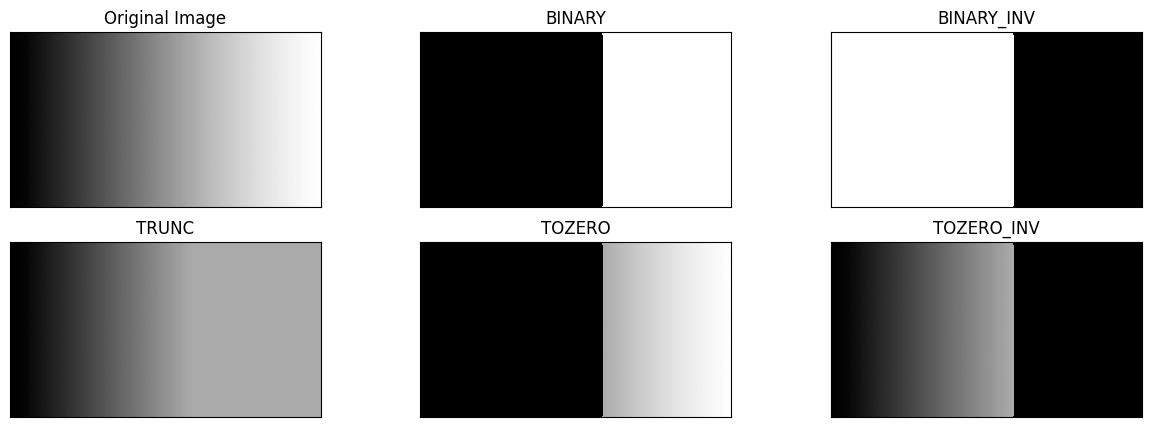

In [4]:
# Global Threshold
# Output image
thresh1 = input_image.copy()
thresh2 = input_image.copy()
thresh3 = input_image.copy()
thresh4 = input_image.copy()
thresh5 = input_image.copy()
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [input_image, thresh1, thresh2, thresh3, thresh4, thresh5]

# Thresholding
thresh = 170

def globalthreshold(threshold, img, type):
  for i in range(input_image.shape[0]):
    for j in range(input_image.shape[1]):
      for c in range(input_image.shape[2]):
        # Binary Threshold
        if(type == 1):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 255
          else:
            img[i,j,c] = 0
        # Binary-Inverted Threshold
        elif(type == 2):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 0
          else:
            img[i,j,c] = 255
        # Truncate Threshold
        elif(type == 3):
          if(img[i,j,c] > threshold):
            img[i,j,c] = threshold
          else:
            img[i,j,c] = img[i,j,c]
        # Threshold To Zero
        elif(type == 4):
          if(img[i,j,c] > threshold):
            img[i,j,c] = img[i,j,c]
          else:
            img[i,j,c] = 0
        # Threshold To Zero – Inverted
        elif(type == 5):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 0
          else:
            img[i,j,c] = img[i,j,c]
  return img

# Memanggil fungsi globalThreshold
for a in range(1, len(images)):
  images[a] = globalthreshold(thresh, images[a], a)

#Membuat figure
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

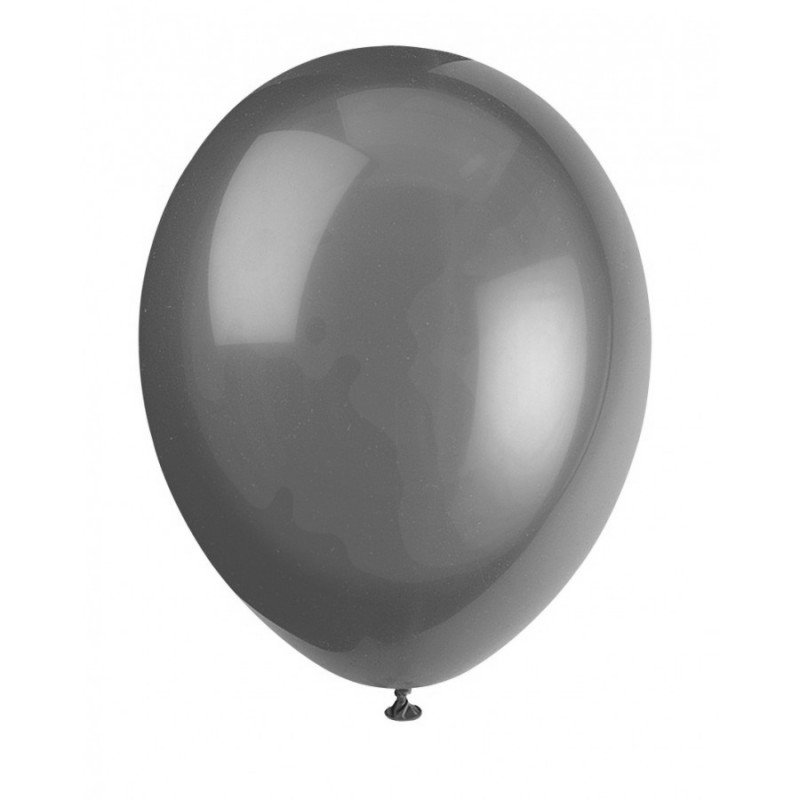

In [5]:
img_ballon = cv.imread('/content/drive/MyDrive/PVCK_MM/Images/balloon.jpg',0)
cv2_imshow(img_ballon)